## Cross-Validation

#### In your notebook's markdown, mention the scenario that your ideal model should stick to.

In an ideal scenario, a model should strike a balance between minimizing bias and minimizing variance. This balance is crucial for achieving optimal predictive performance. The sweet spot for any model would be where an increase in bias is equivalent to the reduction in variance.

Steps:

1. Randomly divide a dataset into k groups, or "folds", of roughly equal size.

2. Choose one of the folds to be the holdout set. Fit the model on the remaining k-1 folds. Calculate the test MSE on the observations in the fold that was held out.

3. Repeat this process k times, using a different set each time as the holdout set. (Fortunately, steps 1-3 are performed with single python method! cross_val_score)

4. Calculate the overall test MSE to be the average of the k test MSE's.

In [2]:
import numpy as np
from sklearn import datasets
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
# Load Iris Dataset
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Initialize the classifier
classifier = LogisticRegression(max_iter=1000) # increased the max iterations

# Perform cross-validation
scores = cross_val_score(classifier,  X, y, scoring='neg_mean_absolute_error', cv=5)  # cv=5 for 5-fold cross-validation

# Print the accuracy for each fold
print("Accuracy for each fold:")
print(np.mean(np.abs(scores))) # changed 'mean' to np.mean and 'absolute' to np.abs

Accuracy for each fold:
0.026666666666666665


The lower the mean absolute error, the better.

#### For your Python codes in kNN, and Logistic Regression, for NAC data, perform cross-validation and document whether these models exhibit consistent performance across different folds and datasets.

I will be reusing the code from Week 4, D5.

In [3]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.impute import SimpleImputer

NAC_data = 'NAC_data.csv'
file = pd.read_csv(NAC_data)
NAC_df = pd.DataFrame(file)

min_val = NAC_df['Market value'].min()
max_val = NAC_df['Market value'].max()
bins = [min_val, 1000000, 5000000, max_val]
labels = ['Lower', 'Middle', 'Higher']

NAC_df['Bin'] = pd.cut(NAC_df['Market value'], bins=bins, labels=labels, include_lowest=True) # Binning the market values 

# Splitting the dataset into testing and training sets
X = NAC_df[['Goals', 'Age', 'xG', 'Duels per 90', 'Height', 'Assists per 90']]
y = NAC_df['Bin']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Using one-hot encoding for adressing categorical data
X_train_encoded = pd.get_dummies(X_train)
X_test_encoded = pd.get_dummies(X_test)

# Handling NaN values using a simple imputer
imputer = SimpleImputer(strategy='mean')
X_train_encoded = pd.DataFrame(imputer.fit_transform(X_train_encoded), columns=X_train_encoded.columns)
X_test_encoded = pd.DataFrame(imputer.transform(X_test_encoded), columns=X_test_encoded.columns)

#### Logistic Regression

              precision    recall  f1-score   support

      Higher       0.00      0.00      0.00        28
       Lower       0.92      1.00      0.96      3037
      Middle       0.25      0.01      0.02       242

    accuracy                           0.92      3307
   macro avg       0.39      0.34      0.32      3307
weighted avg       0.86      0.92      0.88      3307



Text(0.5, 23.52222222222222, 'Predicted values')

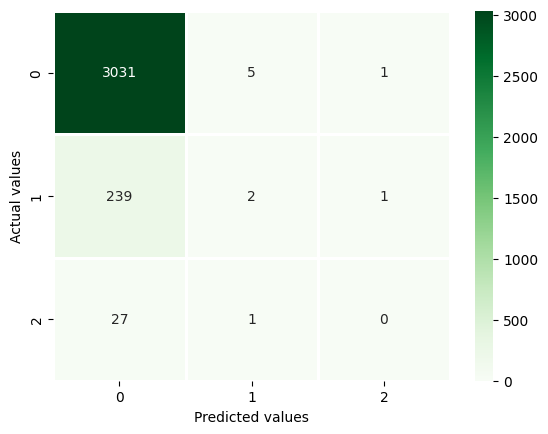

In [4]:
# Instantiating and fitting the model
log_reg = LogisticRegression(max_iter=50000)
log_reg.fit(X_train_encoded, y_train)

# Predict on the test set
y_pred = log_reg.predict(X_test_encoded)

# Model Evaluation
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred, labels=['Lower', 'Middle', 'Higher'])
sns.heatmap(cm, annot=True, cmap="Greens", fmt='g', linewidths=2)
plt.ylabel('Actual values')
plt.xlabel('Predicted values')

In [5]:
# Perform cross validation 
#with 5 folds
cv_scores = cross_val_score(log_reg, X_train_encoded, y_train, cv=5)

print("Cross-Validation Score with 5 folds:", cv_scores)

Cross-Validation Score with 5 folds: [0.91043084 0.90891912 0.90891912 0.91115312 0.91153119]


In [6]:
#with 7 folds
cv_scores = cross_val_score(log_reg, X_train_encoded, y_train, cv=7)

print("Cross-Validation Score with 7 folds:", cv_scores)

Cross-Validation Score with 7 folds: [0.91111111 0.90740741 0.91005291 0.91005291 0.91005291 0.91159344
 0.91159344]


In [7]:
#with 9 folds
cv_scores = cross_val_score(log_reg, X_train_encoded, y_train, cv=9)

print("Cross-Validation Score with 9 folds:", cv_scores)

Cross-Validation Score with 9 folds: [0.91020408 0.91020408 0.90816327 0.90952381 0.91088435 0.90884354
 0.91020408 0.91150442 0.91218516]


In [8]:
#with 10 folds
cv_scores = cross_val_score(log_reg, X_train_encoded, y_train, cv=10)

print("Cross-Validation Score with 10 folds:", cv_scores)

Cross-Validation Score with 10 folds: [0.91080877 0.91080877 0.90854119 0.91005291 0.90929705 0.90854119
 0.91080877 0.91156463 0.91149773 0.91225416]


The performance is not constant across the different fold values.

#### I also tried to use the top-k accuracy score

In [9]:
from sklearn.metrics import top_k_accuracy_score
from sklearn.model_selection import cross_val_predict

# Perform cross-validation
y_pred_cv = cross_val_predict(log_reg, X_train_encoded, y_train, cv=5, method='predict_proba')
print('Cross-val predict score:', y_pred_cv)

# Calculate top-k accuracy scores
top_k_scores = top_k_accuracy_score(y_train, y_pred_cv, k=2) 
# Fit the model on the entire training set
log_reg.fit(X_train_encoded, y_train)

# Predict on the test set
y_pred = log_reg.predict(X_test_encoded)

# Model Evaluation
print("Top-k Accuracy Scores:", top_k_scores)
print("Mean Top-k Accuracy Score:", np.mean(top_k_scores))


Cross-val predict score: [[3.38334888e-03 9.30583028e-01 6.60336232e-02]
 [1.51618938e-04 9.97132862e-01 2.71551918e-03]
 [2.92068213e-03 9.45642048e-01 5.14372699e-02]
 ...
 [4.61345885e-03 9.26897428e-01 6.84891130e-02]
 [2.22906300e-02 8.36254134e-01 1.41455236e-01]
 [7.69823145e-03 9.00474321e-01 9.18274477e-02]]
Top-k Accuracy Scores: 0.9903991533111581
Mean Top-k Accuracy Score: 0.9903991533111581


#### KNN model

0.8990021167221046
              precision    recall  f1-score   support

      Higher       0.15      0.11      0.12        28
       Lower       0.92      0.97      0.95      3037
      Middle       0.18      0.06      0.09       242

    accuracy                           0.90      3307
   macro avg       0.42      0.38      0.39      3307
weighted avg       0.86      0.90      0.88      3307



Text(0.5, 23.52222222222222, 'Predicted values')

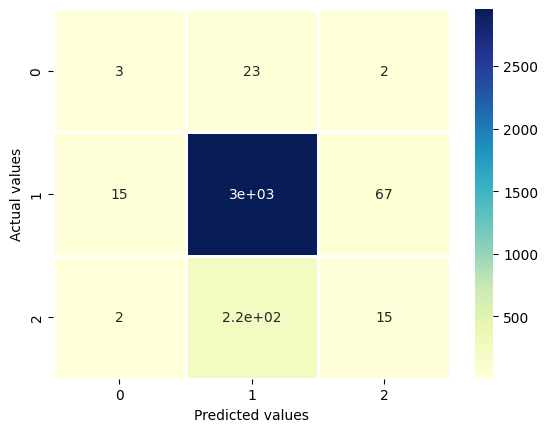

In [10]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_encoded, y_train)

print(knn.score(X_test_encoded, y_test))

y_pred = knn.predict(X_test_encoded)

# Model Evaluation
cm = confusion_matrix(y_test, y_pred)
print(classification_report(y_test, y_pred))

sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap="YlGnBu", linewidths=2)
plt.ylabel('Actual values')
plt.xlabel('Predicted values')

In [11]:
# Perform Cross-Validation
cv_scores = cross_val_score(knn, X_train_encoded, y_train, cv=5)

print("Cross-Validation Score with 5 folds:", cv_scores)

Cross-Validation Score with 5 folds: [0.88851096 0.88321995 0.88095238 0.88922495 0.87939509]


In [12]:
#with 7 folds
cv_scores = cross_val_score(knn, X_train_encoded, y_train, cv=7)

print("Cross-Validation Score with 7 folds:", cv_scores)

Cross-Validation Score with 7 folds: [0.88677249 0.87936508 0.88835979 0.88571429 0.88306878 0.88035998
 0.88035998]


In [13]:
#with 9 folds
cv_scores = cross_val_score(knn, X_train_encoded, y_train, cv=9)

print("Cross-Validation Score with 9 folds:", cv_scores)

Cross-Validation Score with 9 folds: [0.8877551  0.88503401 0.88231293 0.89251701 0.88571429 0.88027211
 0.88979592 0.88291355 0.87542546]


In [14]:
#with 10 folds
cv_scores = cross_val_score(knn, X_train_encoded, y_train, cv=10)

print("Cross-Validation Score with 10 folds:", cv_scores)

Cross-Validation Score with 10 folds: [0.88888889 0.88813303 0.87830688 0.8851096  0.88813303 0.87679516
 0.88662132 0.89115646 0.87897126 0.87972769]


#### Compare and contrast the limitations of K-Means, Hierarchical, and DBSCAN clustering algorithms. In what scenarios would you choose one type over the others?

The choice between K-Means, Hierarchical, and DBSCAN depends on the nature of the data and the goal of the clustering analysis. K-Means is suitable for well-defined spherical clusters, Hierarchical is useful for exploring hierarchical relationships, and DBSCAN excels in identifying clusters with arbitrary shapes and handling noise.

For larger datasets, K-means clustering would be a better choice because it is a computationally efficient method. For small to medium-sized datasets, Hierarchical Clustering would be better suited. However, when the number of clusters is unknown and difficult to specify beforehand, DBSCAN can automatically determine the number based on data density. Therefore, making it the best choice for this situation.